# New york taxi data web scraping

In [2]:
import pandas as pd
print(pd.__version__)

1.5.2


In [4]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")

In [7]:
df.describe()

,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
count,32.00000,32.000000,32.000000,32.000000,30.000000,32.000000
mean,17.80000,6.462500,5.946875,2.856250,17.733333,25062.093750
std,19.29944,4.693905,4.728430,1.873919,9.762466,9502.711577
min,0.00000,0.000000,0.000000,0.000000,1.000000,312.000000
25%,6.82500,1.925000,2.525000,2.100000,9.500000,28587.750000
50%,13.90000,7.750000,5.500000,3.000000,18.500000,28595.000000
75%,20.97500,9.450000,8.800000,3.600000,25.750000,28604.250000
max,100.00000,16.400000,18.500000,9.100000,34.000000,28613.000000


In [1]:
import project_path
from src.util.tensor_projection_depth import tensor_outlying_function, vector_outlying_score
from src.util.graph import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nos = 500
rng = np.random.default_rng(10)
cov = np.array([[3,1.5],[1.5,3]])
mean = np.array([0,0])
sn = rng.multivariate_normal(mean,cov,nos).T
of = np.zeros((nos,1))
for i in range(nos):
    of[i] = 1/(1+vector_outlying_score(sn[:,i],sn))

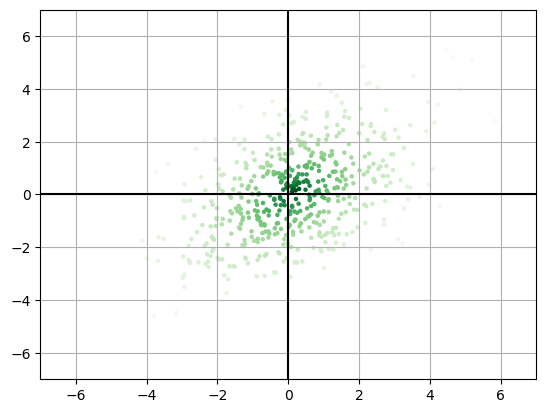

In [8]:
sizelim = 7
fig, axe = plt.subplots(1,1)
axe.scatter(sn[0,:],sn[1,:],s=5, c=of, cmap='Greens')
axe.vlines(0,ymin=-sizelim,ymax=sizelim,colors='k')
axe.hlines(0,xmin=-sizelim,xmax=sizelim,colors='k')
axe.set_xlim(-sizelim,sizelim)
axe.set_ylim(-sizelim,sizelim)
axe.grid()


In [2]:
rand_graph_params = {'dim': 4,'type': 'ba','g_params': 1}
factor_graph_params = [rand_graph_params,rand_graph_params,rand_graph_params]
kwargs = {
        'factor_graph_params': factor_graph_params,
        'product_type': 'cart'
        }

PG = ProductGraph(**kwargs)
PG2 = ProductGraph(**kwargs)
GP = GraphProcess(Graph=PG, filter_type='Heat',filter_parameters=2)
GP2 = GraphProcess(Graph=PG2, filter_type='Heat',filter_parameters=2)

In [3]:
signal = GP.gen_signal(100,0)
Xs = signal['X']
anomaly = GP2.gen_signal(5,0)
Zs = [anomaly[...,i] for i in range(anomaly.shape[3])]
Sn = [Xs[...,i] for i in range(Xs.shape[3])] + [anomaly[...,i] for i in range(anomaly.shape[3])]

In [4]:
o, o_l=  tensor_outlying_function(Z, Sn, maxit=100, err_tol=1e-1, v=2, seed=10, return_Us=False)

It-0, mode:3	 O_R = [18.31218205]
It-0, mode:2	 O_R = [733.86674259]
It-0, mode:1	 O_R = [45697.34407625]
It-1, mode:3	 O_R = [46129.14956813]
It-1, mode:2	 O_R = [55324.18192622]
It-1, mode:1	 O_R = [57353.27653864]
It-2, mode:3	 O_R = [58674.983996]
It-2, mode:2	 O_R = [58689.25748011]
It-2, mode:1	 O_R = [58718.44831204]
It-3, mode:3	 O_R = [58719.19802556]
It-3, mode:2	 O_R = [58721.95774898]
It-3, mode:1	 O_R = [58722.65005805]
It-4, mode:3	 O_R = [58724.77774936]
It-4, mode:2	 O_R = [58726.48855695]
It-4, mode:1	 O_R = [58726.82627101]
It-5, mode:3	 O_R = [58728.38705272]
It-5, mode:2	 O_R = [58729.49868049]
It-5, mode:1	 O_R = [58729.74539968]
It-6, mode:3	 O_R = [58730.80031483]
It-6, mode:2	 O_R = [58731.54722253]
It-6, mode:1	 O_R = [58731.71733864]
It-7, mode:3	 O_R = [58732.45256106]
It-7, mode:2	 O_R = [58732.96627999]
It-7, mode:1	 O_R = [58733.0849766]
It-8, mode:3	 O_R = [58733.60702396]
It-8, mode:2	 O_R = [58733.96764948]
It-8, mode:1	 O_R = [58734.05186292]
It-9, mod

In [5]:
o, o_l=  tensor_outlying_function(Sn[5], Sn, maxit=100, err_tol=1e-1, v=2, seed=10, return_Us=False)

It-0, mode:3	 O_R = [32.41551364]
It-0, mode:2	 O_R = [1075.01236384]
It-0, mode:1	 O_R = [34418.98886673]
It-1, mode:3	 O_R = [36523.71566595]
It-1, mode:2	 O_R = [37148.54223519]
It-1, mode:1	 O_R = [37817.49936614]
It-2, mode:3	 O_R = [38258.7557836]
It-2, mode:2	 O_R = [39090.95953775]
It-2, mode:1	 O_R = [40267.57102833]
It-3, mode:3	 O_R = [41418.1187657]
It-3, mode:2	 O_R = [42615.71837611]
It-3, mode:1	 O_R = [43705.72576851]
It-4, mode:3	 O_R = [44277.37918802]
It-4, mode:2	 O_R = [48312.82584724]
It-4, mode:1	 O_R = [50697.4198959]
It-5, mode:3	 O_R = [51475.88923229]
It-5, mode:2	 O_R = [57210.18595793]
It-5, mode:1	 O_R = [59570.5811265]
It-6, mode:3	 O_R = [61168.41325316]
It-6, mode:2	 O_R = [62376.89060749]
It-6, mode:1	 O_R = [64356.99029601]
It-7, mode:3	 O_R = [65088.35598778]
It-7, mode:2	 O_R = [65359.92976445]
It-7, mode:1	 O_R = [65895.48472883]
It-8, mode:3	 O_R = [66016.12478034]
It-8, mode:2	 O_R = [66094.65611254]
It-8, mode:1	 O_R = [66154.76478755]
It-9, mod

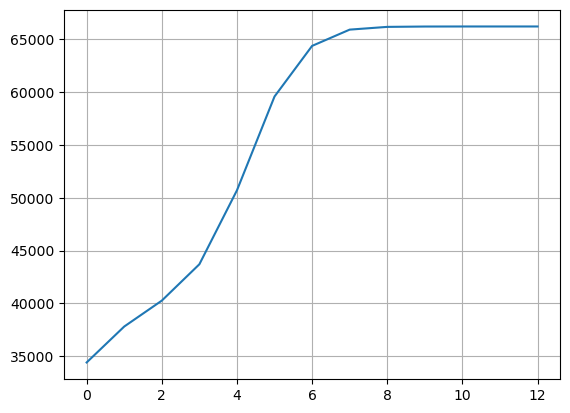

In [6]:
izelim = 7
fig, axe = plt.subplots(1,1)
axe.plot(o_l)
# axe.vlines(0,ymin=-sizelim,ymax=sizelim,colors='k')
# axe.hlines(0,xmin=-sizelim,xmax=sizelim,colors='k')
# axe.set_xlim(-sizelim,sizelim)
# axe.set_ylim(-sizelim,sizelim)
axe.grid()